In [ ]:
!pip install kaggle
from google.colab import files
files.upload()  # Upload your Kaggle API token (kaggle.json)

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saadaltamari","key":"6357c7844d756fff0bd8aa0f02fc32ad"}'}

In [ ]:
  !mkdir ~/.kaggle
  !mv kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d techplusmentor/olive-leaf-disease-datasets

 97% 82.0M/84.1M [00:01<00:00, 68.4MB/s]
100% 84.1M/84.1M [00:01<00:00, 74.9MB/s]


In [ ]:
!unzip olive-leaf-disease-datasets.zip

Streaming output truncated to the last 5000 lines.
  inflating: Olive_Leaf_Disease_Datasets_After_Preprocessing/Healthy/B-14_jpg.rf.f5773bdd41c52005131bc7cfc61a7152.jpg  
  inflating: Olive_Leaf_Disease_Datasets_After_Preprocessing/Healthy/B-150_jpg.rf.5f7a1b2493567d0d6e43b064e83ef746.jpg  
  inflating: Olive_Leaf_Disease_Datasets_After_Preprocessing/Healthy/B-150_jpg.rf.928fa9a72ea56d4d8cd3ebda4c0753a9.jpg  
  inflating: Olive_Leaf_Disease_Datasets_After_Preprocessing/Healthy/B-150_jpg.rf.be715989f3bcc266e85c4a93e9a6e264.jpg  
  inflating: Olive_Leaf_Disease_Datasets_After_Preprocessing/Healthy/B-151.jpg  
  inflating: Olive_Leaf_Disease_Datasets_After_Preprocessing/Healthy/B-152_jpg.rf.1af7cb4f498c3655f85f2db5544877b5.jpg  
  inflating: Olive_Leaf_Disease_Datasets_After_Preprocessing/Healthy/B-152_jpg.rf.970816235ebc3ac9b44be31745fb24cf.jpg  
  inflating: Olive_Leaf_Disease_Datasets_After_Preprocessing/Healthy/B-152_jpg.rf.e33e0a586c139560b642306c88492d4a.jpg  
  inflating: Olive_Lea

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import cv2
import glob as gb
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten ,Conv2D, MaxPool2D ,LeakyReLU


In [ ]:
IMG_SIZE = (299, 299)
directory = "/content/Olive_Leaf_Disease_Datasets_After_Preprocessing"
BATCH_SIZE = 128
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.15,
                                             subset='training',
                                             color_mode='rgb',
                                             seed=42)

validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.15,
                                             subset='validation',
                                             color_mode='rgb',
                                             seed=42)

Found 6961 files belonging to 3 classes.
Using 5917 files for training.
Found 6961 files belonging to 3 classes.
Using 1044 files for validation.


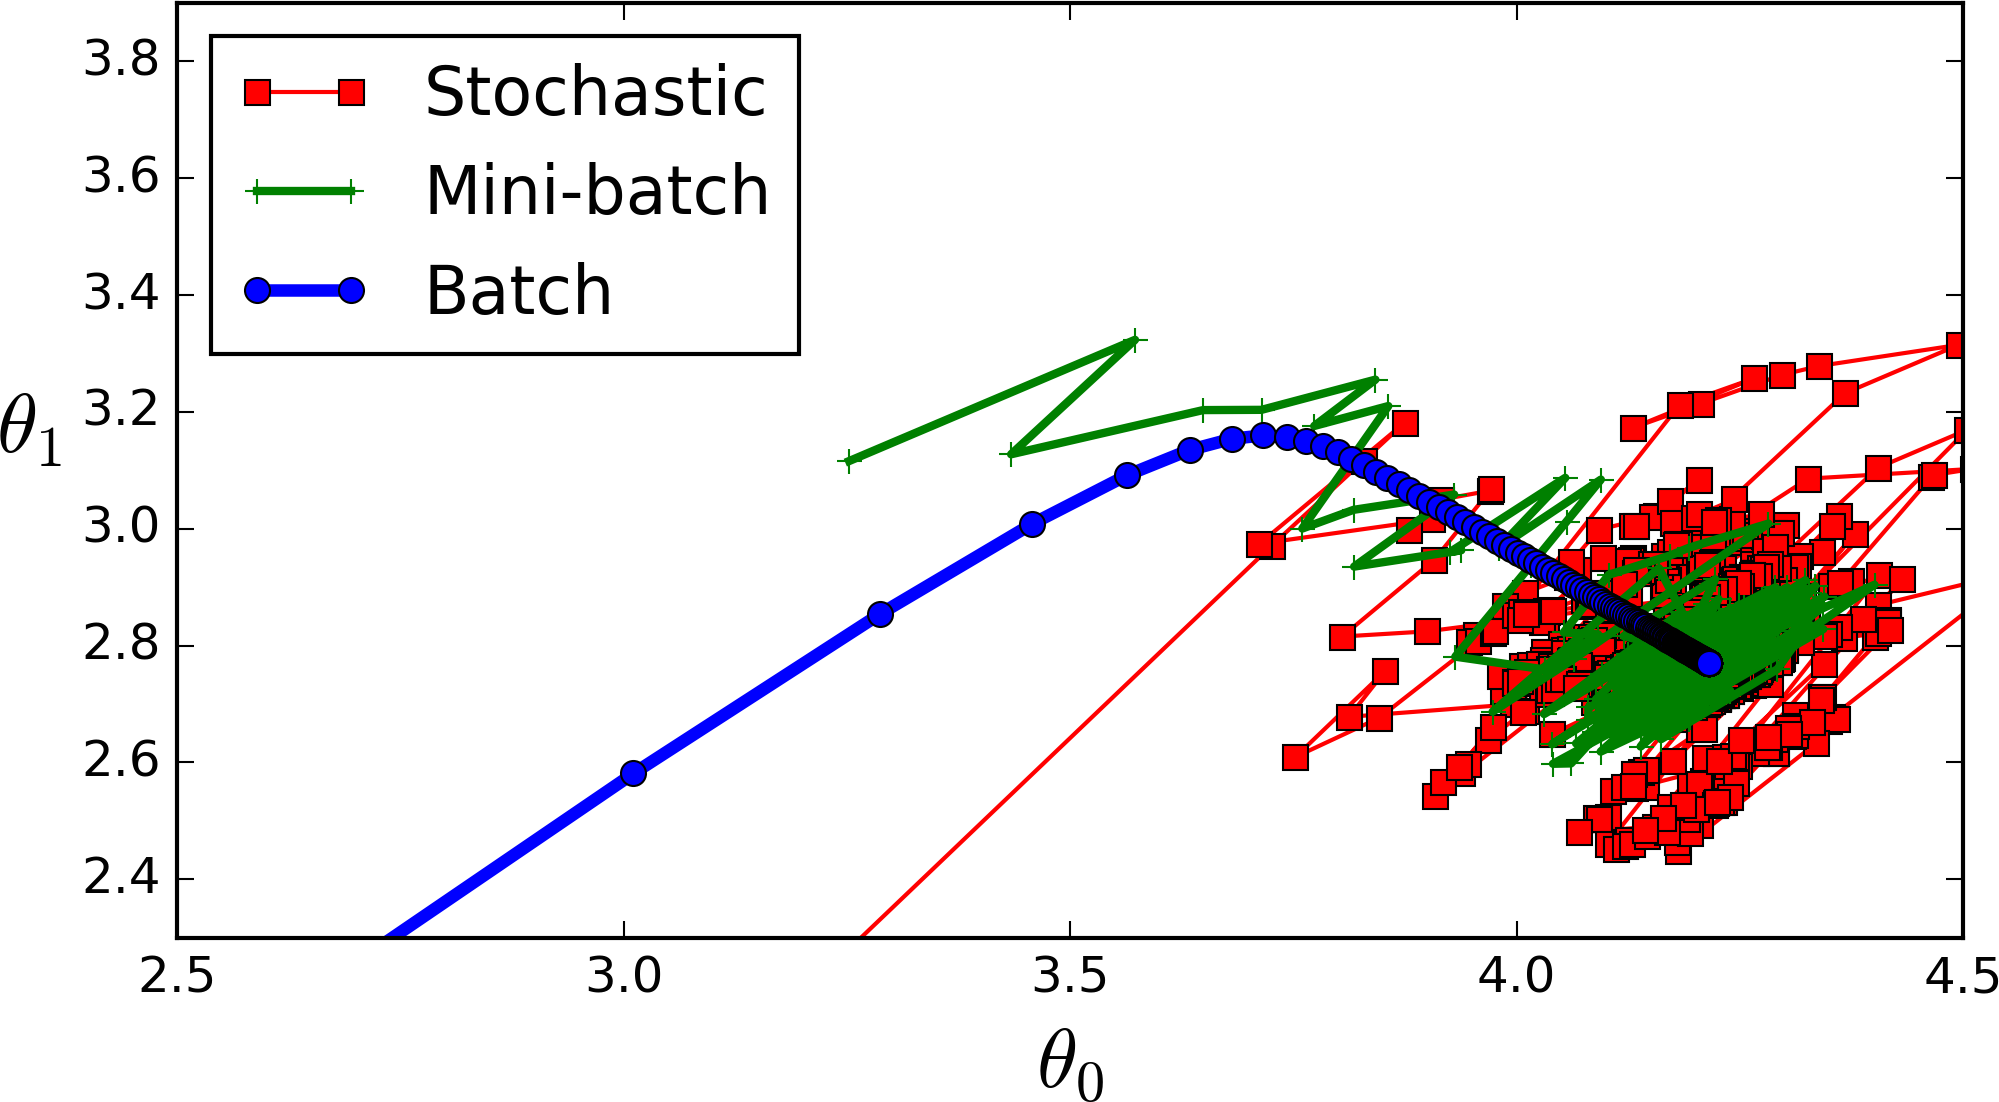

In [ ]:
ClassNames = train_dataset.class_names
ClassNames

['Aculus Olive', 'Healthy', 'olivepeacockspot']

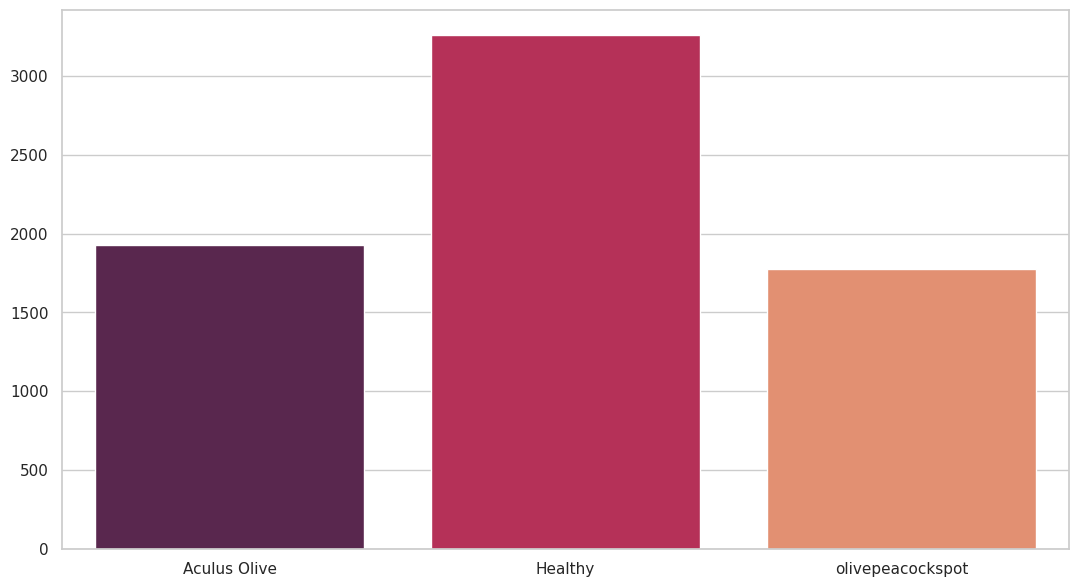

In [ ]:
sns.set_theme(style="whitegrid")
Data_Imbalance = []
for folder in os.listdir(directory):
    files = gb.glob(pathname=str(directory + "/" + folder +"/*.*"))
    Data_Imbalance.append(len(files))
plt.figure(figsize=(13,7))
sns.barplot(x=["Aculus Olive","Healthy","olivepeacockspot"], y=Data_Imbalance, palette="rocket")
plt.show()

In [ ]:
Data_Imbalance

[1926, 3257, 1778]

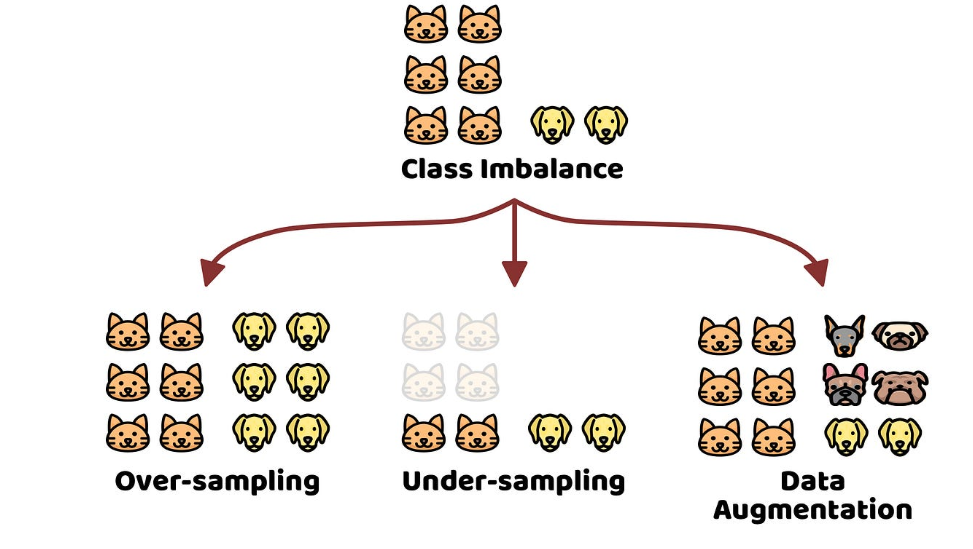

In [ ]:
total = 0
for i in range(0,len(Data_Imbalance)) :
    total +=Data_Imbalance[i]

weight_for_0 = (1 / Data_Imbalance[0]) * (total / 3.0)
weight_for_1 = (1 / Data_Imbalance[1]) * (total / 3.0)
weight_for_2 = (1 / Data_Imbalance[2]) * (total / 3.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))


Weight for class 0: 1.20
Weight for class 1: 0.71
Weight for class 2: 1.31


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])
data_augmentation

In [ ]:
Take1 = train_dataset.take(1)
Take1

<_TakeDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

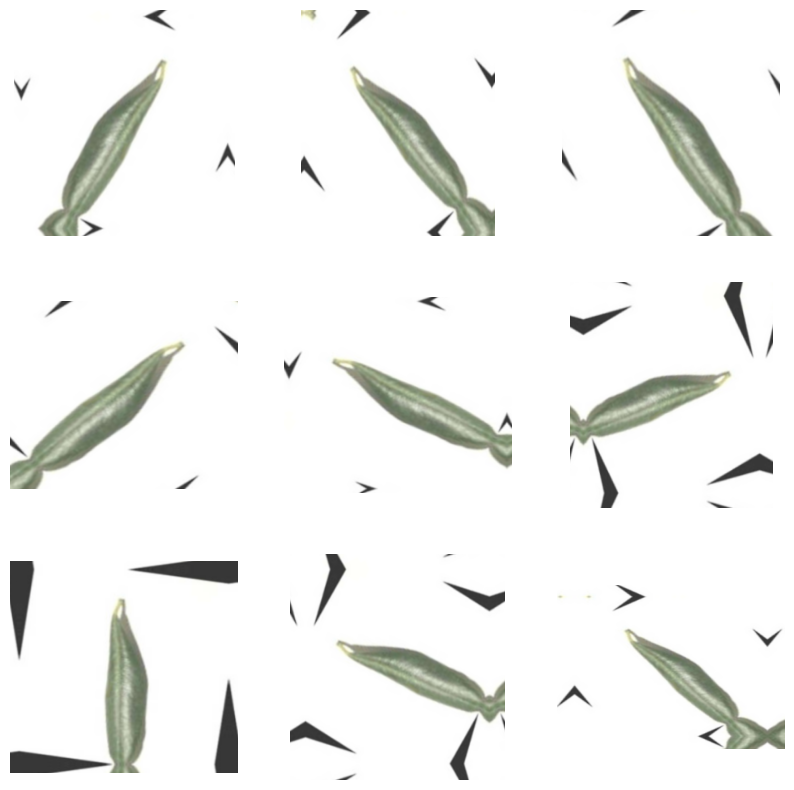

In [ ]:
for image, _ in Take1:
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

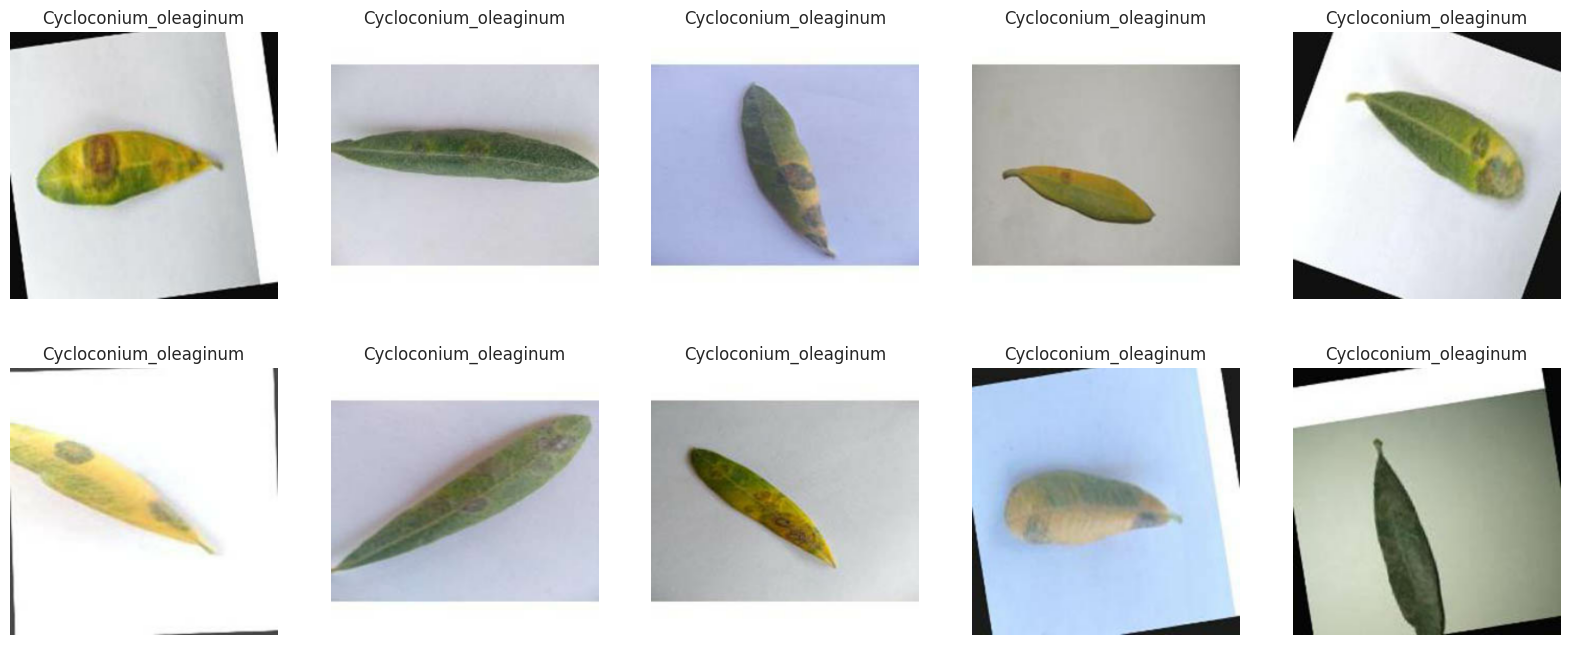

In [ ]:
#['Aculus Olive', 'Healthy', 'olivepeacockspot']
#Olive peacock spot (Cycloconium oleaginum)

plt.figure(figsize=(20,8))
Cycloconium_oleaginum = []
rust_mite = []
Healthy =[]
for images , labels in train_dataset.take(1):
    for i in range(100):
        if ClassNames[labels[i]] == "olivepeacockspot":
            Cycloconium_oleaginum.append(images[i].numpy().astype("uint8"))
        if  ClassNames[labels[i]] == "Aculus Olive":
            rust_mite.append(images[i].numpy().astype("uint8"))
        if  ClassNames[labels[i]] == "Healthy":
            Healthy.append(images[i].numpy().astype("uint8"))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(Cycloconium_oleaginum[i])
    plt.axis("off")
    plt.title("Cycloconium_oleaginum")

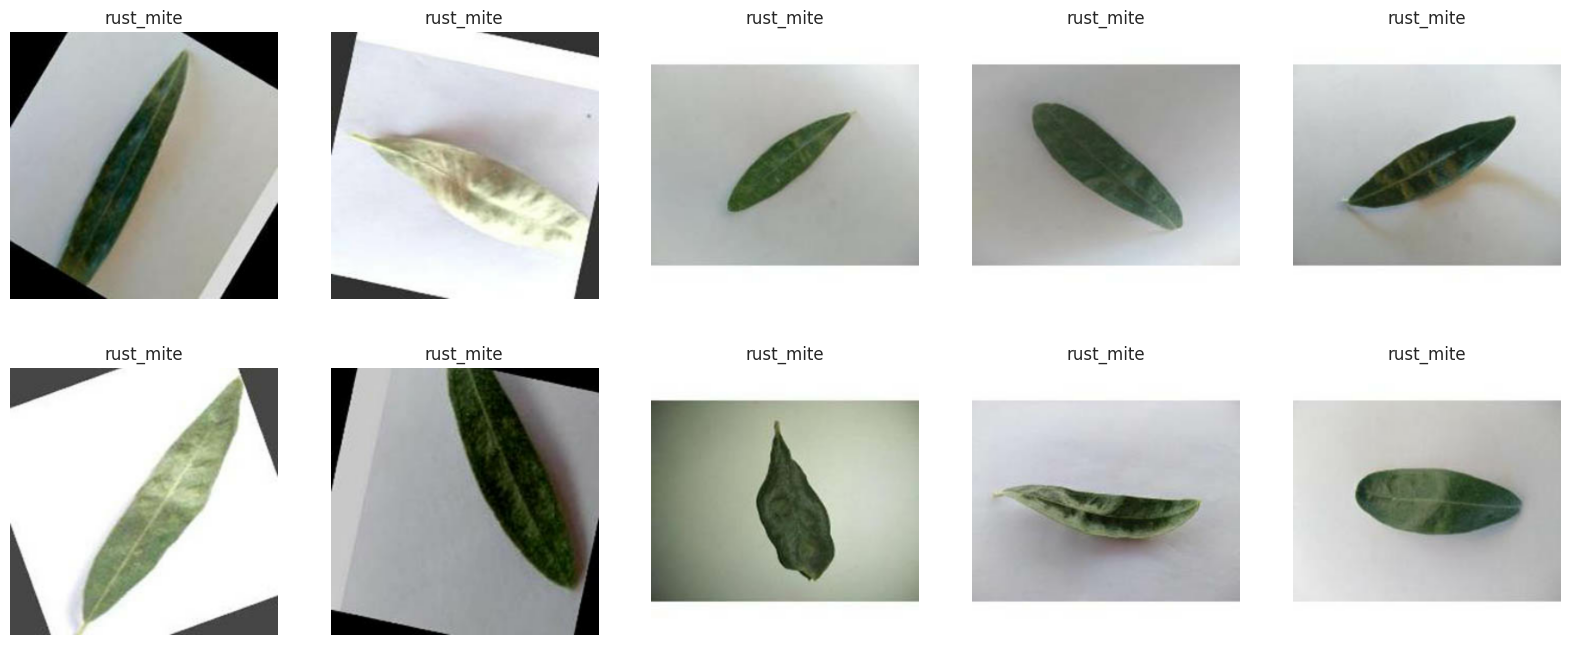

In [ ]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(rust_mite[i])
    plt.axis("off")
    plt.title("rust_mite")

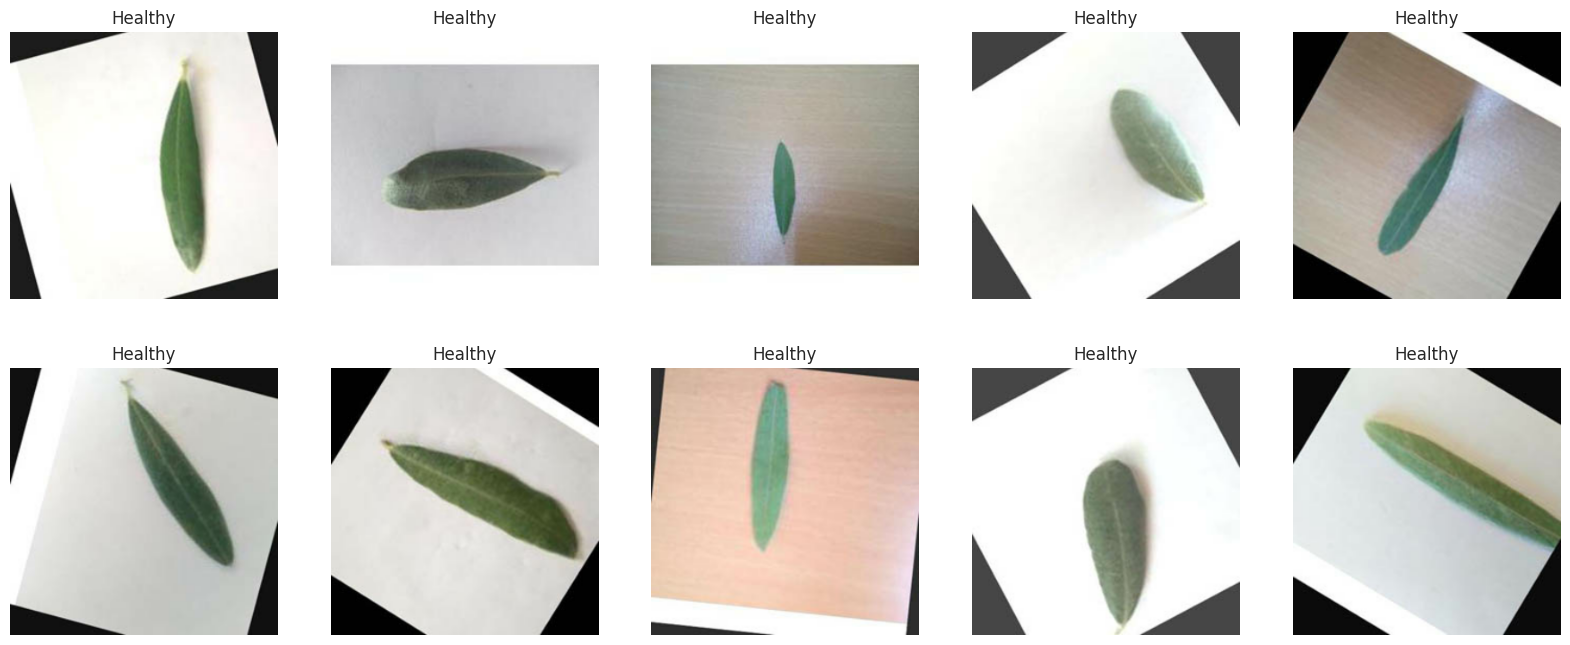

In [ ]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(Healthy[i])
    plt.axis("off")
    plt.title("Healthy")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
#حجم المخزن المؤقت

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top= False,weights='imagenet')
# IMG_SHAPE (299,299) + (3,)  = (299, 299,3)

87910968/87910968 [==============================] - 0s 0us/step


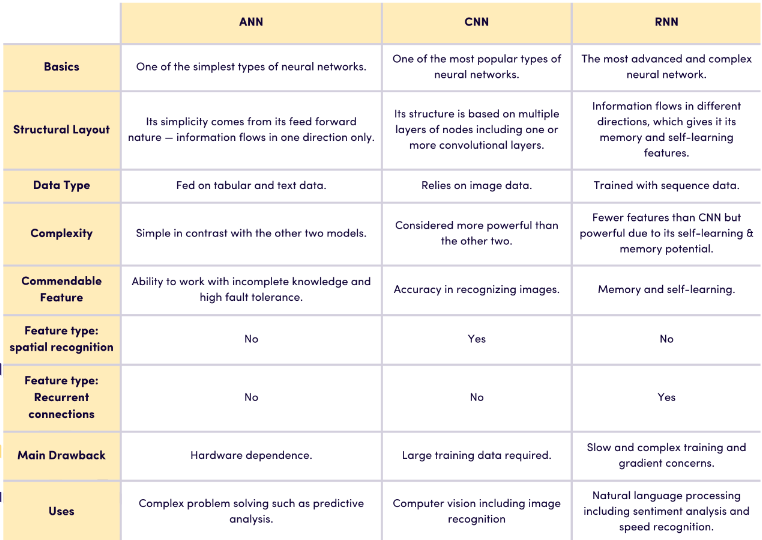

In this code, you are setting up a pre-trained InceptionV3 model as the base model for transfer learning in your computer vision project. The InceptionV3 model is a deep convolutional neural network that was trained on the ImageNet dataset. By using a pre-trained model as the base, you can leverage its learned features to solve a different computer vision task more efficiently.

Let's break down the code:

IMG_SHAPE = IMG_SIZE + (3,): This line creates the IMG_SHAPE variable, which represents the input shape of the images that will be fed into the InceptionV3 model. It is a tuple obtained by concatenating the IMG_SIZE tuple (which is (299, 299) in your case) with (3,). The additional (3,) indicates that the images have 3 color channels (RGB), which is the standard input shape for most computer vision models.

base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights='imagenet'): This line creates the InceptionV3 model as the base model. Let's understand the arguments used:

input_shape=IMG_SHAPE: This sets the input shape of the model to IMG_SHAPE, which you defined earlier as (299, 299, 3). This tells the model what shape of images to expect as input during training and inference.

include_top=False: This argument specifies whether to include the fully connected layers (top) of the InceptionV3 model. **Since you are using the InceptionV3 as a feature extractor and not for classification**, you set include_top to False. This means that the final fully connected layers of InceptionV3, which are responsible for classification, will not be included in the model.
**By dropping the top layer, you effectively remove the classification capabilities of the Inception v3 model. This is often done when you want to repurpose the model for a different task or use it as a feature extractor for transfer learning.**

weights='imagenet': This argument specifies that you want to use the pre-trained weights of InceptionV3 that were trained on the ImageNet dataset. By setting weights to 'imagenet', the model will be initialized with the weights learned during the original training on ImageNet.

After creating the base_model, you can build your custom classification head on top of it to adapt it for your specific computer vision task. For example, you can add a few fully connected layers and the output layer with the appropriate number of units to match the number of classes in your task. This is a common approach in transfer learning, where you use a pre-trained model as the base and fine-tune it on a new dataset to achieve better performance with less training data.

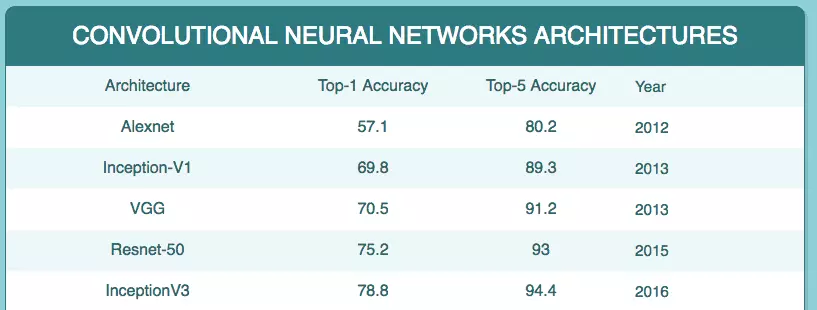

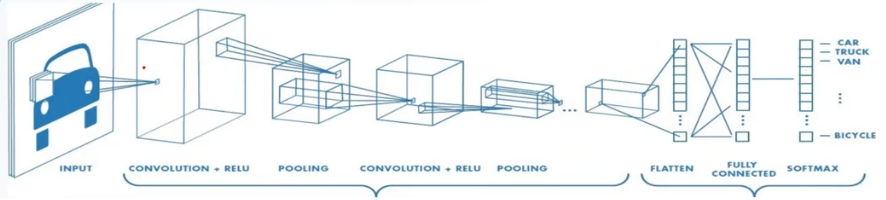

In [ ]:
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

preprocess_input = tf.keras.applications.inception_v3.preprocess_input: This line sets up the preprocess_input function. This function is used to preprocess input images before passing them through the InceptionV3 model for inference.

It is important to preprocess the images appropriately when using pre-trained models because these models were typically trained on large datasets with specific preprocessing steps. The preprocess_input function ensures that the images are preprocessed in the same way as during the original training of the InceptionV3 model on the ImageNet dataset. This helps achieve more accurate and consistent results during inference.

In [ ]:
nb_layers = len(base_model.layers)
print("Numbers of Layers =" , nb_layers)
print(base_model.layers[nb_layers - 2].name)
print(base_model.layers[nb_layers - 1].name)

Numbers of Layers = 311
activation_93
mixed10



Since you are using include_top=False when creating the base_model, the last two layers are not the final classification layers, but rather the global average pooling layer and the dense layer before that. These layers are responsible for reducing the spatial dimensions and converting the extracted features to the final output shape.

By printing the second-to-last and last layer names, you can get insights into the architecture of the base_model. The second-to-last layer is typically the global average pooling layer, and the last layer is usually a dense layer that represents the bottleneck layer with the desired number of output units before the final classification layers.

Knowing the architecture of the base_model is essential when performing transfer learning, as it helps in understanding the structure of the features that your model is leveraging from the pre-trained InceptionV3 model.

In [ ]:
# iterate over first batch (128 image) in trainset
image_batch, label_batch = next(iter(train_dataset))  # 128 image arrays
feature_batch = base_model(image_batch)  # run the model on those 128 image
print(feature_batch.shape)

(128, 8, 8, 2048)


In [ ]:
def plant_leaf_model( image_shape=IMG_SIZE):
    ''' Define a tf.keras model for multi-class classification out of the InceptionV3 model '''
    image_shape = image_shape + (3,)

    resnet_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top= False,weights='imagenet')
    resnet_model.trainable = True
    for layer in resnet_model.layers[0 : 291]:
        layer.trainable = False

    inputs = tf.keras.Input(image_shape)
    x = data_augmentation(inputs)
    x = preprocess_input(inputs)
    x = resnet_model(x , training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    prediction_layer = tf.keras.layers.Dense(3 ,activation = "softmax")
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    model.summary()

    return model

for layer in resnet_model.layers[0 : 291]:
        layer.trainable = False:

    x = resnet_model(x , training=False)

        

In [ ]:
Plant_Leaf_Model = plant_leaf_model(IMG_SIZE)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 299, 299, 3)]     0         
                                                                 
 tf.math.truediv_5 (TFOpLamb  (None, 299, 299, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_5 (TFOpLam  (None, 299, 299, 3)      0         
 bda)                                                            
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                           

In [ ]:
base_learning_rate = 0.001
Plant_Leaf_Model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
                           metrics=['accuracy'])


In [ ]:
  history = Plant_Leaf_Model.fit(train_dataset , verbose=2 , epochs=3 ,class_weight=class_weight,
                               validation_data=validation_dataset , use_multiprocessing= True)

Epoch 1/3
47/47 - 43s - loss: 0.8233 - accuracy: 0.7784 - val_loss: 0.2638 - val_accuracy: 0.8927 - 43s/epoch - 924ms/step
Epoch 2/3
47/47 - 32s - loss: 0.1972 - accuracy: 0.9339 - val_loss: 0.1802 - val_accuracy: 0.9339 - 32s/epoch - 690ms/step
Epoch 3/3
47/47 - 39s - loss: 0.1371 - accuracy: 0.9528 - val_loss: 0.2624 - val_accuracy: 0.8985 - 39s/epoch - 820ms/step


In [ ]:
"""# Test the Model"""

y_pred = cnn_model.predict(X_test)
y_pred.round(2)

y_test

cnn_model.evaluate(X_test, y_test)

"""# Visualize output

plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')
"""

plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

"""## Confusion Matrix"""

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your test data and labels
test_data = validation_dataset
test_labels = validation_dataset

# Load your model using the defined function
model = plant_leaf_model()

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names) #     ClassNames
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.python.ops.numpy_ops import np_config

#history = Plant_Leaf_Model.fit(train_dataset, verbose=2, epochs=2, class_weight=class_weight, validation_data=validation_dataset, use_multiprocessing=True)

# Assuming the training loop has finished and you have access to the trained model

# Iterate over the validation dataset to get predictions and true labels
predicted_labels = []
true_labels = []
np_config.enable_numpy_behavior()
for batch in validation_dataset:
    inputs, labels = batch
    predictions = Plant_Leaf_Model.predict(inputs)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.tolist())
    true_labels = true_labels[:len(predicted_labels)]


# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)


1/1 [==============================] - 0s 41ms/step
Confusion Matrix:
[[228   4  12]
 [  3 284  15]
 [  6  13 479]]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.python.ops.numpy_ops import np_config

#history = Plant_Leaf_Model.fit(train_dataset, verbose=2, epochs=2, class_weight=class_weight, validation_data=validation_dataset, use_multiprocessing=True)

# Assuming the training loop has finished and you have access to the trained model

# Iterate over the validation dataset to get predictions and true labels
predicted_labels = []
true_labels = []
np_config.enable_numpy_behavior()
for batch in validation_dataset:
    inputs, labels = batch
    predictions = Plant_Leaf_Model.predict(inputs)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.tolist())
    true_labels = true_labels[:len(predicted_labels)]

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

# Calculate and print classification report
class_names = ["Aculus Olive", "Healthy", "olivepeacockspot"]  # Replace with your class names
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

1/1 [==============================] - 0s 40ms/step
Confusion Matrix:
[[228   4  12]
 [  3 284  15]
 [  6  13 479]]
Classification Report:
                  precision    recall  f1-score   support

    Aculus Olive       0.96      0.93      0.95       244
         Healthy       0.94      0.94      0.94       302
olivepeacockspot       0.95      0.96      0.95       498

        accuracy                           0.95      1044
       macro avg       0.95      0.95      0.95      1044
    weighted avg       0.95      0.95      0.95      1044



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.python.ops.numpy_ops import np_config

#history = Plant_Leaf_Model.fit(train_dataset, verbose=2, epochs=2, class_weight=class_weight, validation_data=validation_dataset, use_multiprocessing=True)

# Assuming the training loop has finished and you have access to the trained model

# Iterate over the validation dataset to get predictions and true labels
predicted_labels = []
true_labels = []
np_config.enable_numpy_behavior()
for batch in validation_dataset:
    inputs, labels = batch
    predictions = Plant_Leaf_Model.predict(inputs)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.tolist())
    true_labels = true_labels[:len(predicted_labels)]

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

# Calculate and print classification report
class_names = ["Aculus Olive", "Healthy", "olivepeacockspot"]  # Replace with your class names
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

1/1 [==============================] - 0s 42ms/step
Confusion Matrix:
[[228   4  12]
 [  3 284  15]
 [  6  13 479]]
Classification Report:
                  precision    recall  f1-score   support

    Aculus Olive       0.96      0.93      0.95       244
         Healthy       0.94      0.94      0.94       302
olivepeacockspot       0.95      0.96      0.95       498

        accuracy                           0.95      1044
       macro avg       0.95      0.95      0.95      1044
    weighted avg       0.95      0.95      0.95      1044



1/1 [==============================] - 0s 52ms/step


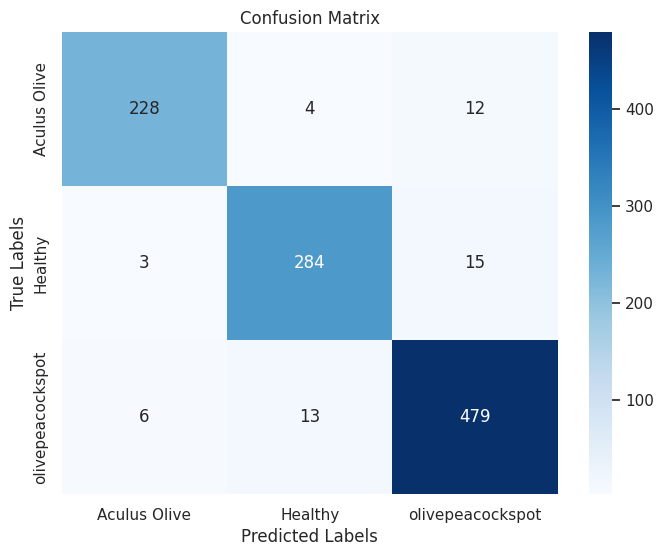

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.python.ops.numpy_ops import np_config

#history = Plant_Leaf_Model.fit(train_dataset, verbose=2, epochs=2, class_weight=class_weight, validation_data=validation_dataset, use_multiprocessing=True)

# Assuming the training loop has finished and you have access to the trained model

# Iterate over the validation dataset to get predictions and true labels
predicted_labels = []
true_labels = []
np_config.enable_numpy_behavior()
for batch in validation_dataset:
    inputs, labels = batch
    predictions = Plant_Leaf_Model.predict(inputs)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.tolist())
    true_labels = true_labels[:len(predicted_labels)]

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names) #     ClassNames
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
Plant_Leaf_Model.evaluate(validation_dataset , verbose = 1)


9/9 [==============================] - 6s 469ms/step - loss: 0.2624 - accuracy: 0.8985


[0.26242876052856445, 0.8984674215316772]

1/1 [==============================] - 0s 34ms/step


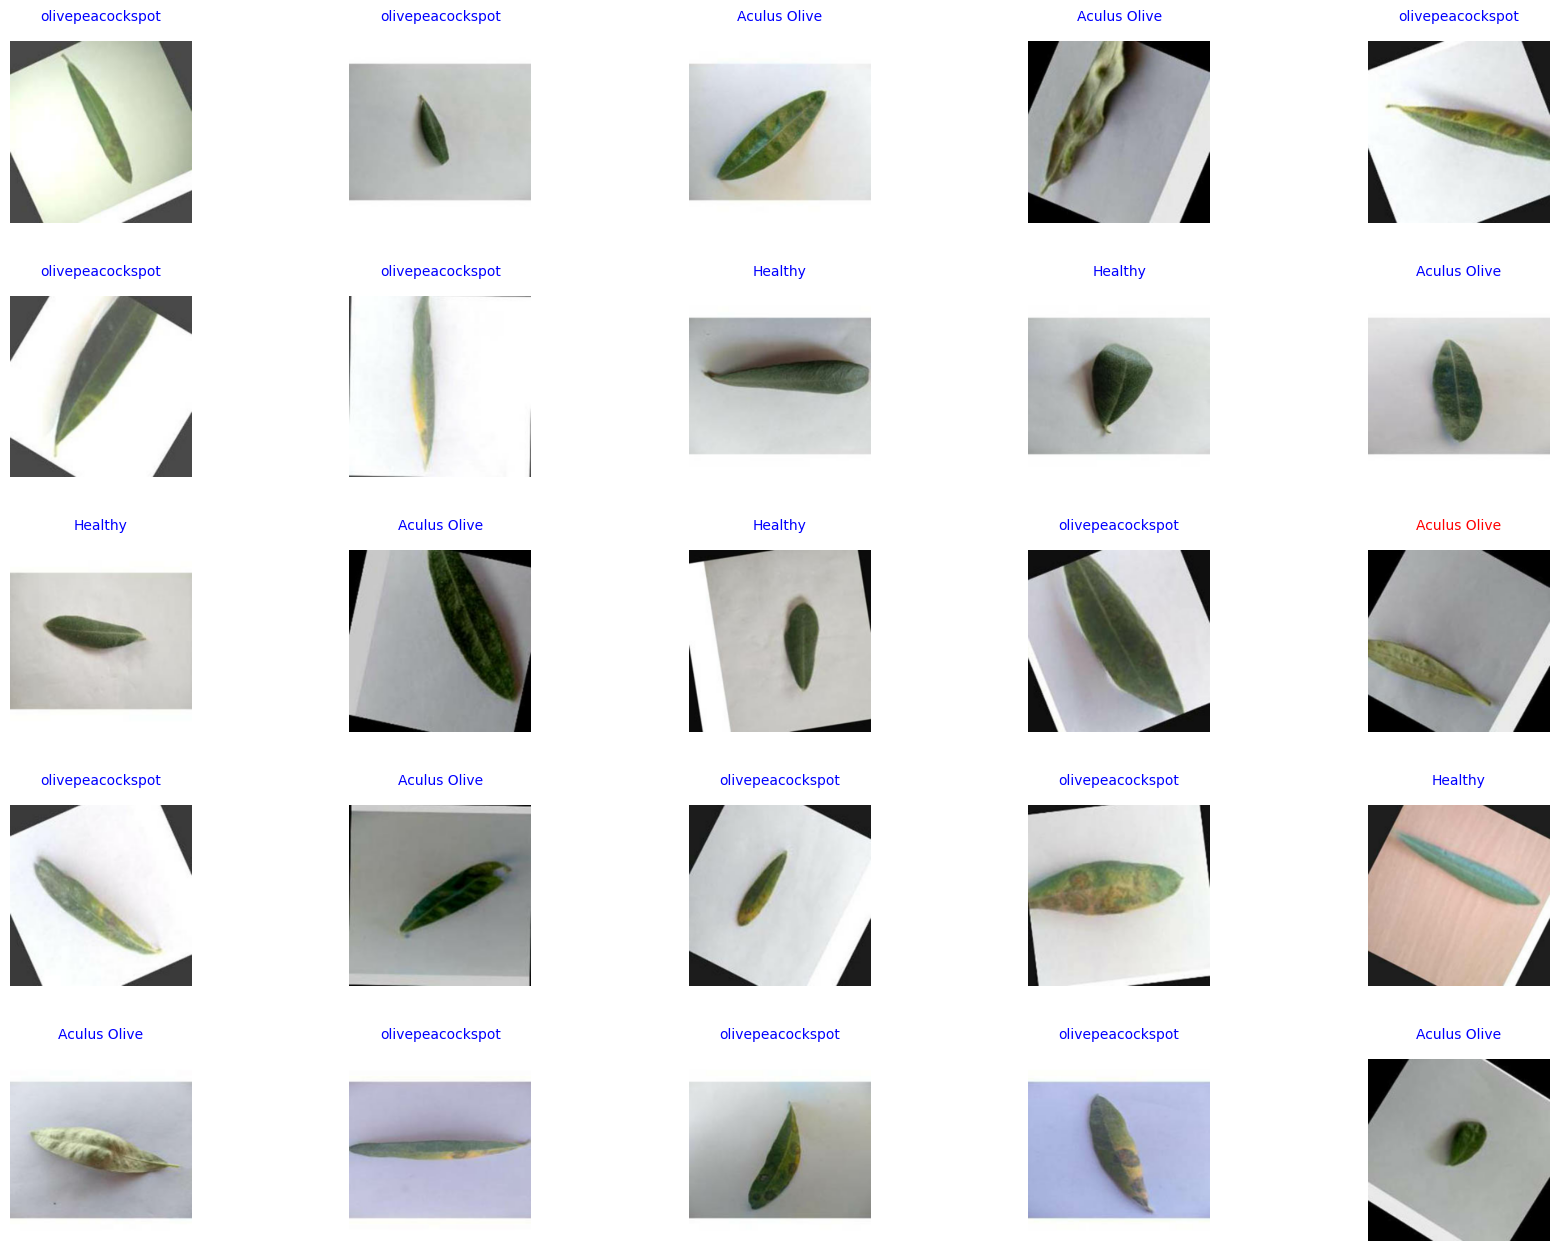

In [ ]:
plt.figure(figsize=(20, 15))
for images, labels in train_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = Plant_Leaf_Model.predict(img2)
        predicted= ClassNames[np.argmax(predict)]
        actual = ClassNames [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

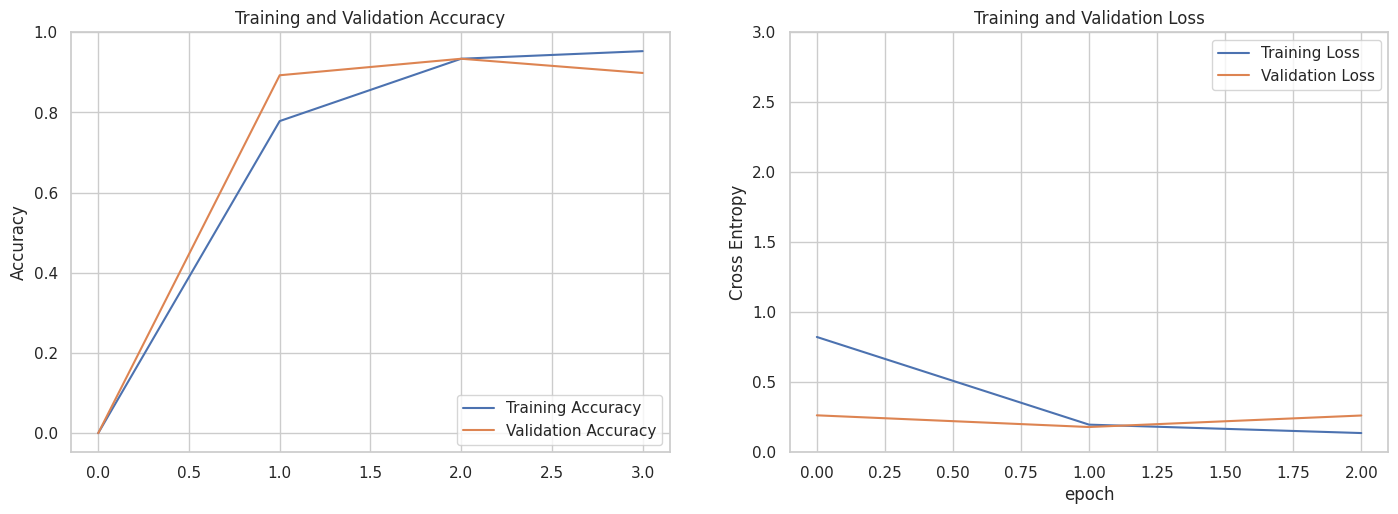

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
